# Bike Rental Assignment

### Step 1: Reading and understanding data

In [1]:
# importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the data
rental= pd.read_csv(r'F:\Upgrad Notes\Machine Learning 1\Linear Regression Assignment\day.csv')

In [4]:
# Check the head of the dataset
rental.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#check the shape of dataset
rental.shape

(730, 16)

In [6]:
#check the info of dataset
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#check all the columns
rental.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#describe columns
rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#converting season column to object(categorical) form
def set_season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    
rental['season'] = rental['season'].apply(set_season)

In [10]:
#checking distinct values
rental['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
#converting month column to object(categorical) form
def conv_month(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

rental[['mnth']] = rental[['mnth']].apply(conv_month) 

In [12]:
#checking distinct values
rental['mnth'].astype('category').value_counts()

Oct    62
May    62
Mar    62
Jul    62
Jan    62
Dec    62
Aug    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [13]:
#checking distinct values
rental['yr'].astype('category').value_counts()

1    365
0    365
Name: yr, dtype: int64

In [14]:
#checking distinct values
rental['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [15]:
#checking distinct values
rental['weekday'].astype('category').value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [16]:
#converting weekday column to object(categorical) form
def conv_weekday(x):
    return x.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

rental[['weekday']] = rental[['weekday']].apply(conv_weekday)

In [17]:
#checking distinct values
rental['weekday'].astype('category').value_counts()

Tuesday      105
Monday       105
Wednesday    104
Thursday     104
Sunday       104
Saturday     104
Friday       104
Name: weekday, dtype: int64

In [18]:
#checking distinct values
rental['workingday'].astype('category').value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [19]:
#converting weathersit column to object(categorical) form
def conv_weathersit(x):
    return x.map({1:'A',2:'B',3:'C',4:'D'})

rental[['weathersit']] = rental[['weathersit']].apply(conv_weathersit)

In [20]:
#checking distinct values
rental['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [21]:
#convert date to datetime
rental['dteday']= rental['dteday'].astype('datetime64')

In [22]:
#check info of rental dataframe
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [411]:
#storing the categorical var
rental_categorical = rental.select_dtypes(exclude=['float64','datetime64','int64'])


In [412]:
#columns in dataframe
rental_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

### Step 2: Visualising the data

#### Numerical Columns

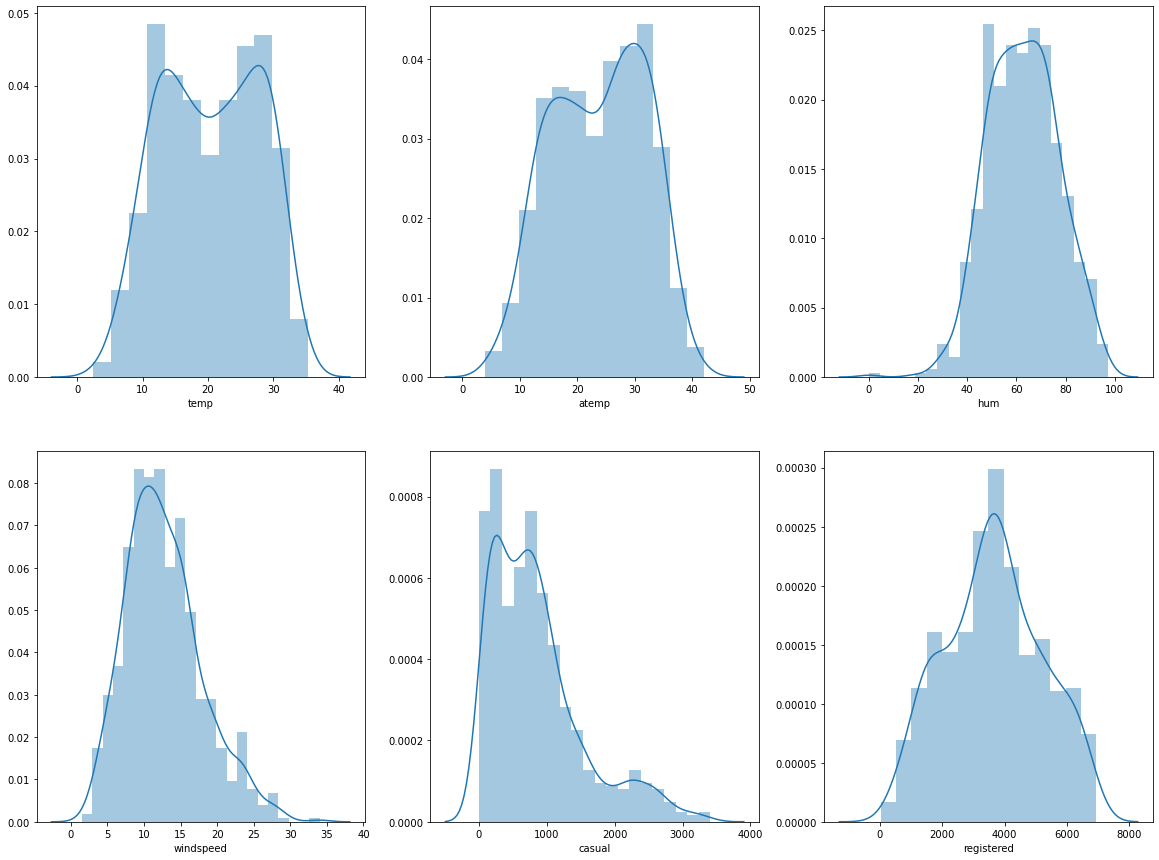

In [23]:
#plotting distplot to numerical columns
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.distplot(rental['temp'])
plt.subplot(2,3,2)
sns.distplot(rental['atemp'])
plt.subplot(2,3,3)
sns.distplot(rental['hum'])
plt.subplot(2,3,4)
sns.distplot(rental['windspeed'])
plt.subplot(2,3,5)
sns.distplot(rental['casual'])
plt.subplot(2,3,6)
sns.distplot(rental['registered'])
plt.show()

#### Categorical Values

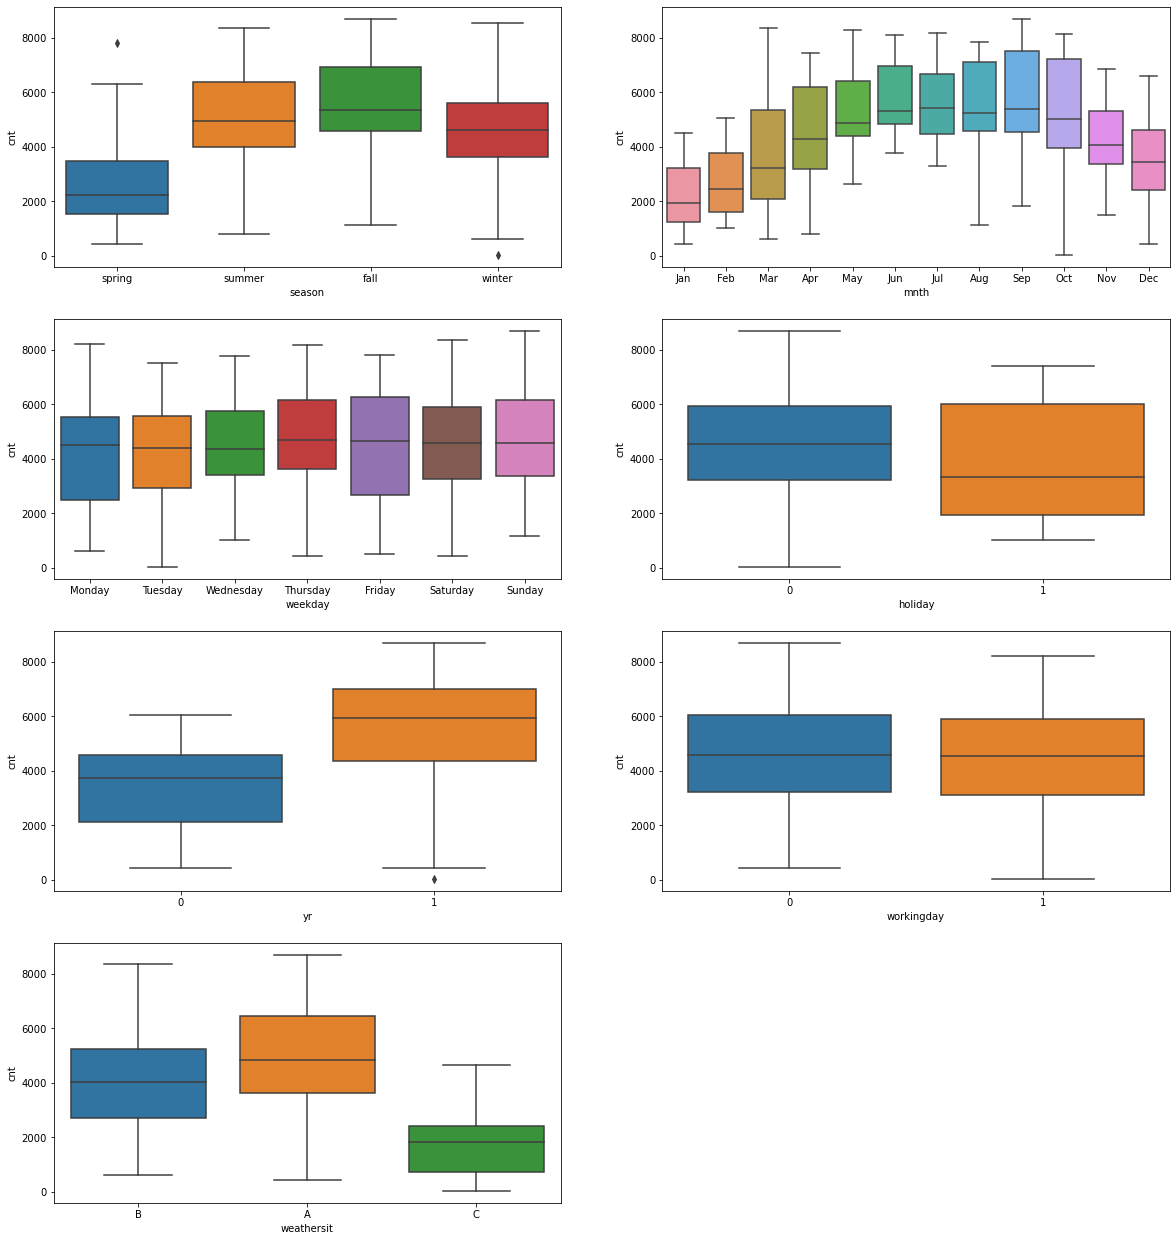

In [24]:
#plotting boxplot to categorical columns
plt.figure(figsize=(20, 22))
plt.subplot(4,2,1)
sns.boxplot(x= 'season', y= 'cnt', data= rental)
plt.subplot(4,2,2)
sns.boxplot(x= 'mnth', y= 'cnt', data= rental)
plt.subplot(4,2,3)
sns.boxplot(x= 'weekday', y= 'cnt', data= rental)
plt.subplot(4,2,4)
sns.boxplot(x= 'holiday', y= 'cnt', data= rental)
plt.subplot(4,2,5)
sns.boxplot(x= 'yr', y= 'cnt', data= rental)
plt.subplot(4,2,6)
sns.boxplot(x= 'workingday', y= 'cnt', data= rental)
plt.subplot(4,2,7)
sns.boxplot(x= 'weathersit', y= 'cnt', data= rental)
plt.show()

In [25]:
#converting from int to float
var_list = [ 'casual', 'registered', 'cnt']

for var in var_list:
    rental[var] = rental[var].astype('float')

In [26]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    float64       
 14  registered  730 non-null    float64       
 15  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), floa

In [27]:
#all numerical column
rental_numeric = rental.select_dtypes(include=['float64'])
rental_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


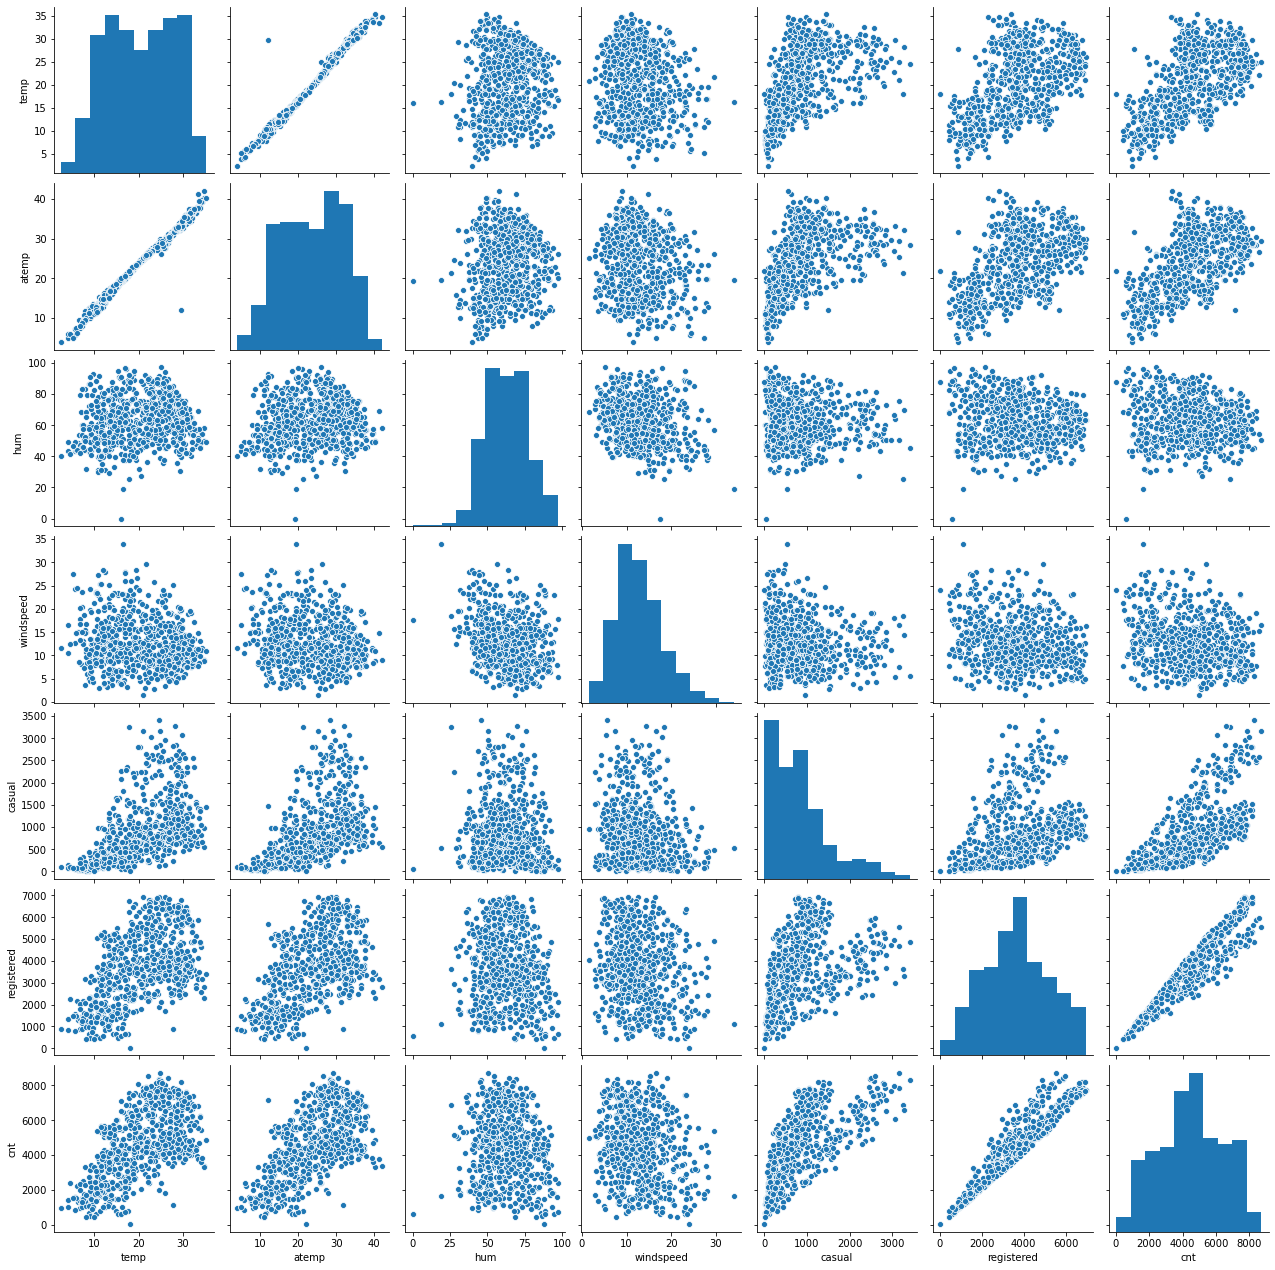

In [28]:
#plotting pairplot  for numerical column
sns.pairplot(rental_numeric)
plt.show()

In [29]:
#making correlation matrix
corr= rental_numeric.corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


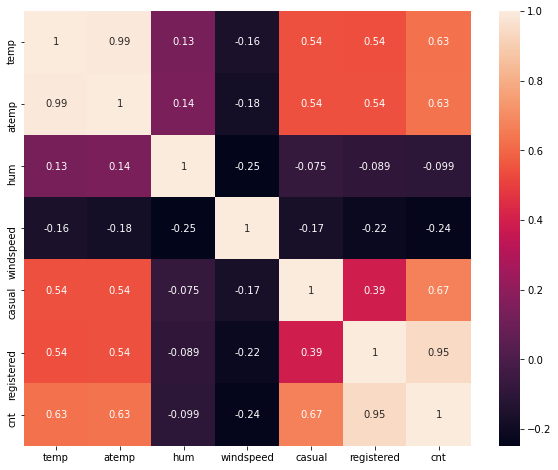

In [30]:
#plotting heatmap of correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True)
plt.show()

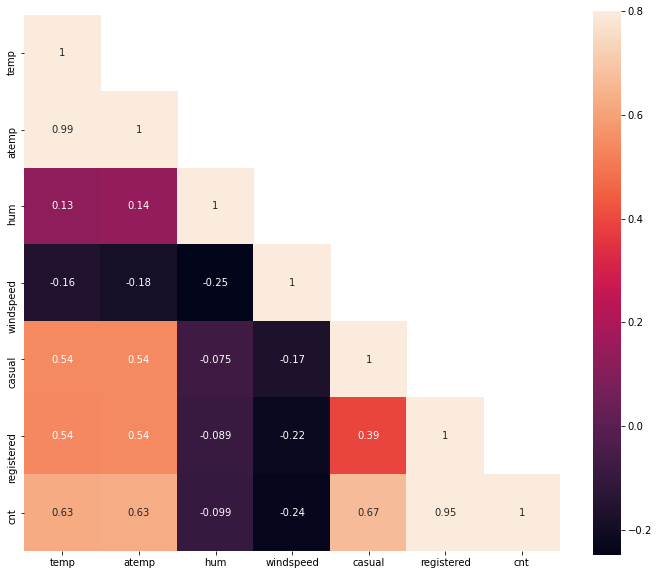

In [31]:
# heatmap for data

mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(12,10)
sns.heatmap(corr,mask=mask,vmax=0.8,square=True,annot=True);

In [32]:
#dropping atemp column
rental.drop('atemp', axis=1, inplace=True)

### Step 3: Data Prepration

In [33]:
# Categorical var

rental_categorical = rental.select_dtypes(include=['object'])
rental_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [34]:
#convert data into dummy var
rental_dummies= pd.get_dummies(rental_categorical, drop_first= True)
rental_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#drop categorical variables
rental= rental.drop(rental_categorical.columns, axis= 1)
rental.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [36]:
#concat dummy var
rental= pd.concat([rental, rental_dummies], axis= 1)

In [37]:
rental.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#dropping instant and dteday column
rental= rental.drop(['instant', 'dteday'], axis=1, inplace= False)

In [39]:
rental.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,0,0,0


### Step 4: Splitting the Data into Training and Testing Sets

In [40]:
#importing libraries
from sklearn.model_selection import train_test_split

In [41]:
#dividing data into train, test
df_train, df_test = train_test_split(rental, train_size=0.70, random_state=0)

In [42]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_B,weathersit_C
524,1,0,0,29.144153,43.7083,9.667229,2708.0,4790.0,7498.0,0,...,0,0,0,0,1,0,0,0,0,0
12,0,0,0,6.765000,47.0417,20.167000,38.0,1368.0,1406.0,1,...,0,0,0,1,0,0,0,0,0,0
161,0,0,1,29.725000,65.4583,10.374950,1729.0,3237.0,4966.0,0,...,0,0,1,0,0,0,0,0,0,0
556,1,0,1,29.383347,63.3333,10.166111,975.0,6289.0,7264.0,0,...,0,0,0,0,0,1,0,0,0,0
502,1,0,0,23.130847,52.3333,9.166739,1521.0,6118.0,7639.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1,0,1,15.750847,90.5417,10.584325,441.0,2787.0,3228.0,0,...,0,0,1,0,0,0,0,0,1,0
192,0,0,1,32.560847,55.9167,13.417018,662.0,3596.0,4258.0,0,...,0,0,0,0,0,1,0,0,0,0
629,1,0,0,26.650000,64.6667,19.000061,2512.0,5883.0,8395.0,0,...,0,1,0,0,1,0,0,0,0,0
559,1,0,0,28.836653,69.9167,9.626493,2355.0,4614.0,6969.0,0,...,0,0,0,0,1,0,0,0,1,0


In [43]:
#shape of train data
df_train.shape

(510, 31)

In [44]:
#shape of test data
df_test.shape

(220, 31)

####  Scaling

In [45]:
#importing libraries for MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [46]:
#create list of num columns
num_vars= ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [47]:
#fit-transform MinMax Scaling
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [48]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_B,weathersit_C
524,1,0,0,0.802869,0.254640,0.255430,0.832615,0.688709,0.860101,0,...,0,0,0,0,1,0,0,0,0,0
12,0,0,0,0.089497,0.301044,0.647940,0.011077,0.194629,0.159227,1,...,0,0,0,1,0,0,0,0,0,0
161,0,0,1,0.821384,0.557424,0.281887,0.531385,0.464482,0.568799,0,...,0,0,1,0,0,0,0,0,0,0
556,1,0,1,0.810494,0.527842,0.274080,0.299385,0.905140,0.833180,0,...,0,0,0,0,0,1,0,0,0,0
502,1,0,0,0.611185,0.374709,0.236721,0.467385,0.880450,0.876323,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.029412,0.700000,0.514246,0.514303,0.373352,0.258475,0.523877,0.514084,0.245098,...,0.086275,0.076471,0.141176,0.139216,0.137255,0.160784,0.135294,0.139216,0.335294,0.023529
std,0.500487,0.169124,0.458708,0.242926,0.194712,0.192759,0.208892,0.220440,0.217119,0.430568,...,0.281045,0.266010,0.348545,0.346511,0.344454,0.367693,0.342373,0.346511,0.472557,0.151726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.301603,0.361513,0.232054,0.096077,0.357530,0.365221,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.499006,0.513631,0.352763,0.221538,0.524184,0.521859,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732894,0.651342,0.482854,0.330538,0.676401,0.670156,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


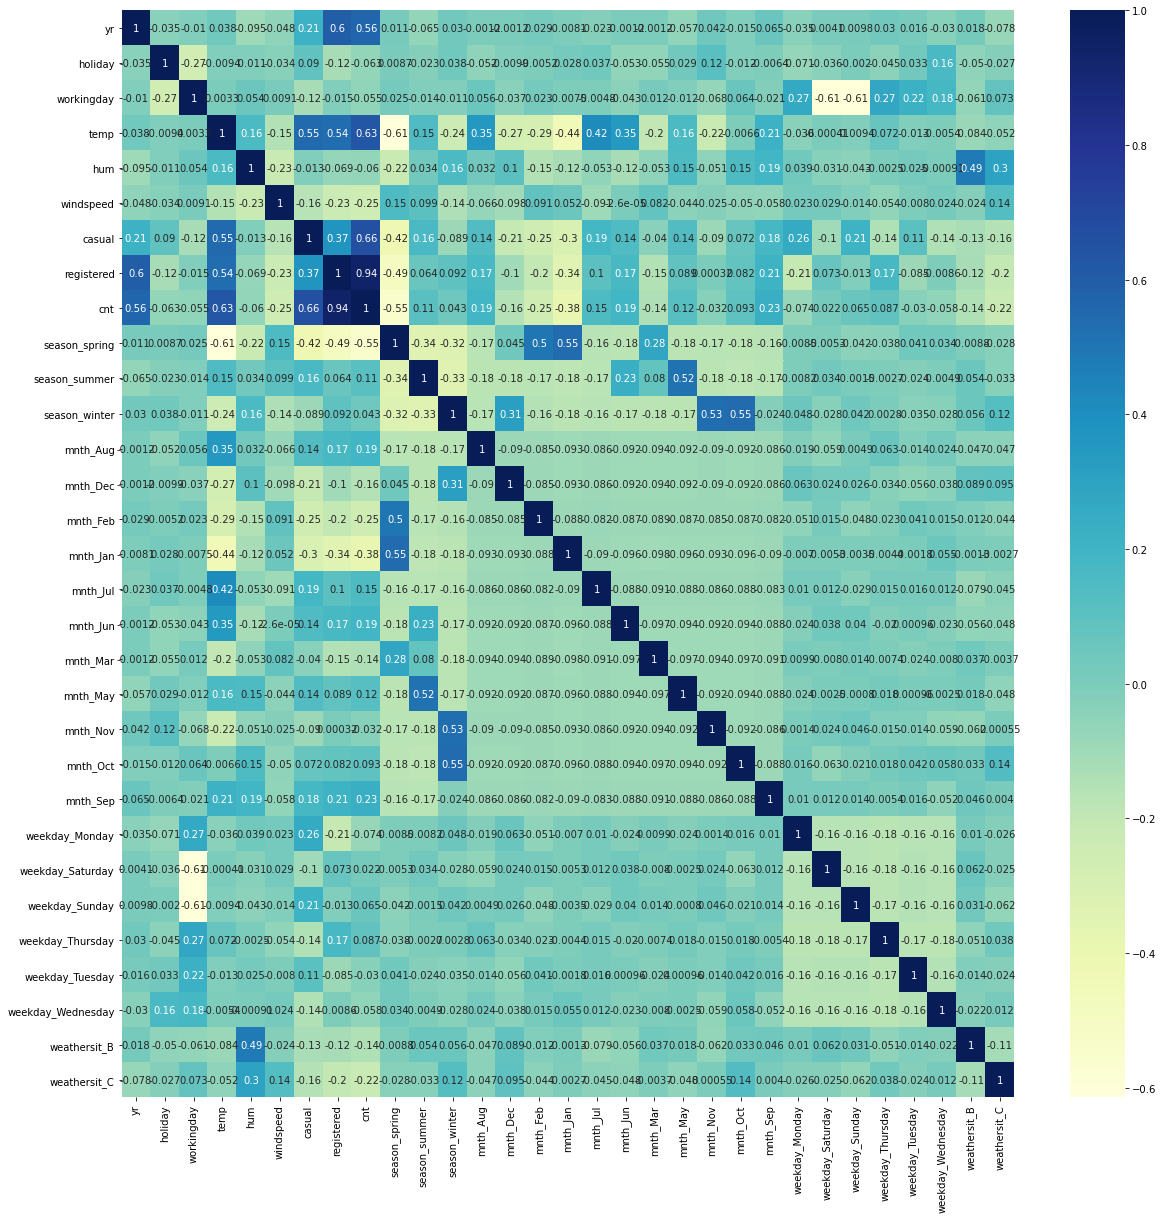

In [50]:
#heat map to show correlation between data
plt.figure(figsize= (20, 20))
sns.heatmap(df_train.corr(), annot= True, cmap= 'YlGnBu')
plt.show()

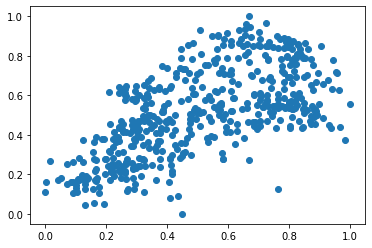

In [51]:
#temp and cnt are highly correlated, plot a scatter plot amont them.
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [52]:
#preparing y_train data
y_train= df_train.pop('cnt')

In [53]:
#dropping 'registered' and 'casual' columns as as 'cnt'= 'registered'+ 'casual'
X_train= df_train.drop(['casual', 'registered'], axis=1, inplace=False)

In [54]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_B,weathersit_C
524,1,0,0,0.802869,0.254640,0.255430,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
12,0,0,0,0.089497,0.301044,0.647940,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
161,0,0,1,0.821384,0.557424,0.281887,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
556,1,0,1,0.810494,0.527842,0.274080,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
502,1,0,0,0.611185,0.374709,0.236721,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
#converting all values into array
np.asarray(X_train)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### Step 5: Building the model

In [56]:
#importing libraries
import statsmodels.api as sm

* Building the model with all the variable

In [57]:
#build linear model

#add a constant
X_train_sm = sm.add_constant(X_train)

#model creation
lr= sm.OLS(y_train, X_train_sm)

In [58]:
#fit the model
lr_model= lr.fit()

In [59]:
#params
lr_model.params

const                0.425394
yr                   0.221283
holiday             -0.109185
workingday          -0.064076
temp                 0.425676
hum                 -0.140827
windspeed           -0.134149
season_spring       -0.094694
season_summer       -0.003902
season_winter        0.057425
mnth_Aug            -0.029442
mnth_Dec            -0.049387
mnth_Feb            -0.050017
mnth_Jan            -0.062294
mnth_Jul            -0.083689
mnth_Jun            -0.034445
mnth_Mar             0.001537
mnth_May             0.028189
mnth_Nov            -0.060662
mnth_Oct             0.009858
mnth_Sep             0.045358
weekday_Monday      -0.023183
weekday_Saturday    -0.047897
weekday_Sunday      -0.040824
weekday_Thursday     0.009384
weekday_Tuesday     -0.012930
weekday_Wednesday   -0.011150
weathersit_B        -0.045238
weathersit_C        -0.197313
dtype: float64

In [60]:
#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     86.97
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          1.20e-168
Time:                        15:31:40   Log-Likelihood:                 515.31
No. Observations:                 510   AIC:                            -972.6
Df Residuals:                     481   BIC:                            -849.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4254      0.075      5.677      0.000       0.278       0.573
yr                    0.2213      0.008     26.542      0.000       0.205       0.238
holiday              -0.1092      0.054     -2.014      0.045      -0.216      -0.003
workingday           -0.0641      0.061     -1.055      0.292      -0.183       0.055
temp                  0.4257      0.046      9.228      0.000       0.335       0.516
hum                  -0.1408      0.031     -4.522      0.000      -0.202      -0.080
windspeed            -0.1341      0.023     -5.766      0.000      -0.180      -0.088
season_spring        -0.0947      0.031     -3.104      0.002      -0.155      -0.035
season_summer        -0.0039      0.025     -0.156      0.876      -0.053       0.045
season_winter         0.0574      0.029      1.954      0.051      -0.000       0.115
mnth_Aug             -0.0294      0.034     -0.874      0.382      -0.096       0.037
mnth_Dec             -0.0494      0.035     -1.420      0.156      -0.118       0.019
mnth_Feb             -0.0500      0.033     -1.497      0.135      -0.116       0.016
mnth_Jan             -0.0623      0.035     -1.797      0.073      -0.130       0.006
mnth_Jul             -0.0837      0.035     -2.386      0.017      -0.153      -0.015
mnth_Jun             -0.0344      0.025     -1.355      0.176      -0.084       0.016
mnth_Mar              0.0015      0.025      0.060      0.952      -0.049       0.052
mnth_May              0.0282      0.021      1.350      0.178      -0.013       0.069
mnth_Nov             -0.0607      0.038     -1.612      0.108      -0.135       0.013
mnth_Oct              0.0099      0.037      0.269      0.788      -0.062       0.082
mnth_Sep              0.0454      0.032      1.429      0.154      -0.017       0.108
weekday_Monday       -0.0232      0.015     -1.529      0.127      -0.053       0.007
weekday_Saturday     -0.0479      0.062     -0.776      0.438      -0.169       0.073
weekday_Sunday       -0.0408      0.061     -0.668      0.504      -0.161       0.079
weekday_Thursday      0.0094      0.015      0.644      0.520      -0.019       0.038
weekday_Tuesday      -0.0129      0.015     -0.841      0.401      -0.043       0.017
weekday_Wednesday    -0.0111      0.015     -0.726      0.468      -0.041       0.019
weathersit_B         -0.0452      0.011     -4.101      0.000      -0.067      -0.024
weathersit_C         -0.1973      0.031     -6.268      0.000      -0.259      -0.135
==============================================================================
Omnibus:                       90.095   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.179
Skew:                          -0.871   Prob(JB):                     7.01e-53
Kurtosis:      

### Checking VIF
- Check for the VIF values of the feature variables.

In [61]:
# importing library to calculate VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# dataframe that contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,49.43
3,temp,38.06
4,hum,18.03
6,season_spring,13.34
8,season_winter,12.70
21,weekday_Saturday,10.24
22,weekday_Sunday,9.79
7,season_summer,8.71
18,mnth_Oct,6.76
17,mnth_Nov,6.69


### Step 6: Using RFE to build model

In [63]:
# Importing RFE and LinearRegression libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [64]:
# Running RFE with the output variable = 15
lm= LinearRegression()
lm.fit(X_train, y_train)

rfe= RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', False, 6),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 10),
 ('weathersit_B', False, 2),
 ('weathersit_C', True, 1)]

In [66]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Nov', 'weathersit_C'],
      dtype='object')

In [67]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'mnth_Sep', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_B'],
      dtype='object')

#### Build model using statsmodel

In [68]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [69]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [70]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [71]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     153.4
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          7.59e-175
Time:                        15:35:57   Log-Likelihood:                 497.68
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     494   BIC:                            -895.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3595      0.028     12.911

In [72]:
a = X_train_rfe.drop(['const'], axis=1)

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = a
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.52
3,hum,9.31
5,season_spring,4.21
4,windspeed,4.10
6,season_winter,2.89
10,mnth_Jan,2.38
0,yr,2.08
9,mnth_Feb,2.07
11,mnth_Jul,1.89
13,mnth_Nov,1.84


* Here values of VIF are very High for some columns.

* Now we will try to build RFE using 10 features.

In [74]:
# Running RFE with the output variable = 10
lm= LinearRegression()
lm.fit(X_train, y_train)

rfe_1= RFE(lm, 10)
rfe_1 = rfe_1.fit(X_train, y_train)

In [75]:
list(zip(X_train.columns,rfe_1.support_,rfe_1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 18),
 ('season_winter', False, 2),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', False, 5),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', False, 19),
 ('mnth_May', False, 12),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 16),
 ('mnth_Sep', False, 11),
 ('weekday_Monday', False, 13),
 ('weekday_Saturday', False, 9),
 ('weekday_Sunday', False, 10),
 ('weekday_Thursday', False, 17),
 ('weekday_Tuesday', False, 14),
 ('weekday_Wednesday', False, 15),
 ('weathersit_B', False, 7),
 ('weathersit_C', True, 1)]

In [76]:
col_1 = X_train.columns[rfe_1.support_]
col_1

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'mnth_Aug', 'mnth_Jul', 'mnth_Jun', 'weathersit_C'],
      dtype='object')

In [78]:
X_train.columns[~rfe_1.support_]

Index(['workingday', 'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_B'],
      dtype='object')

In [79]:
# Creating X_train_rfe_1 dataframe with RFE selected variables
X_train_rfe_1 = X_train[col_1]

In [80]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_1 = sm.add_constant(X_train_rfe_1)

In [81]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe_1).fit()   

In [82]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.0
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          1.44e-176
Time:                        15:43:22   Log-Likelihood:                 488.12
No. Observations:                 510   AIC:                            -954.2
Df Residuals:                     499   BIC:                            -907.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3640      0.023     16.131

In [83]:
a = X_train_rfe.drop(['const'], axis=1)

In [84]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = a
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.52
3,hum,9.31
5,season_spring,4.21
4,windspeed,4.10
6,season_winter,2.89
10,mnth_Jan,2.38
0,yr,2.08
9,mnth_Feb,2.07
11,mnth_Jul,1.89
13,mnth_Nov,1.84


* By using 10 features also RFE is very high.

* We will now use 6 variables.

In [85]:
# Running RFE with the output variable = 6
lm= LinearRegression()
lm.fit(X_train, y_train)

rfe2= RFE(lm, 6)
rfe2 = rfe2.fit(X_train, y_train)

In [86]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('yr', True, 1),
 ('holiday', False, 5),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 22),
 ('season_winter', False, 6),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', False, 10),
 ('mnth_Feb', False, 8),
 ('mnth_Jan', False, 9),
 ('mnth_Jul', False, 2),
 ('mnth_Jun', False, 3),
 ('mnth_Mar', False, 23),
 ('mnth_May', False, 16),
 ('mnth_Nov', False, 7),
 ('mnth_Oct', False, 20),
 ('mnth_Sep', False, 15),
 ('weekday_Monday', False, 17),
 ('weekday_Saturday', False, 13),
 ('weekday_Sunday', False, 14),
 ('weekday_Thursday', False, 21),
 ('weekday_Tuesday', False, 18),
 ('weekday_Wednesday', False, 19),
 ('weathersit_B', False, 11),
 ('weathersit_C', True, 1)]

In [87]:
#columns which are with RFE
col = X_train.columns[rfe2.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'season_spring', 'weathersit_C'], dtype='object')

In [88]:
X_train.columns[~rfe2.support_]

Index(['holiday', 'workingday', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_B'],
      dtype='object')

In [89]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe2 = X_train[col]

In [90]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe2 = sm.add_constant(X_train_rfe2)

In [91]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe2).fit()   

In [92]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     319.9
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          4.07e-168
Time:                        15:45:36   Log-Likelihood:                 456.61
No. Observations:                 510   AIC:                            -899.2
Df Residuals:                     503   BIC:                            -869.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3848      0.024     16.330

In [93]:
a = X_train_rfe2.drop(['const'], axis=1)

In [94]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = a
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,6.03
2,hum,5.78
3,windspeed,3.74
0,yr,1.93
4,season_spring,1.68
5,weathersit_C,1.16


### Step 7: Residual Analysis of the train data

In [95]:
#predict y_train using 'X_train_rfe2'
y_train_cnt = lm.predict(X_train_rfe2)

In [96]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

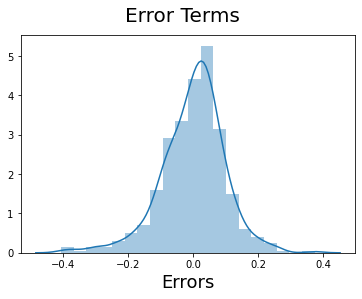

In [98]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20) 
# X-label
plt.xlabel('Errors', fontsize = 18)    
plt.show()

### Step 8: Making Predictions Using the Final Model

In [99]:
#numerival variables of data
num_vars

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [100]:
#scaling test data
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [101]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_B,weathersit_C
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.027273,0.668182,0.538518,0.532982,0.366151,0.265831,0.528852,0.520799,0.250,...,0.081818,0.095455,0.150000,0.150000,0.154545,0.100000,0.163636,0.150000,0.340909,0.040909
std,0.501120,0.163248,0.471940,0.230286,0.205931,0.197966,0.216932,0.236357,0.235684,0.434,...,0.274713,0.294512,0.357886,0.357886,0.362295,0.300684,0.370789,0.357886,0.475096,0.198531
min,0.000000,0.000000,0.000000,-0.048868,-0.353829,-0.049874,0.002154,0.062229,0.067073,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.360687,0.387181,0.227015,0.100308,0.363846,0.355442,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.565441,0.527552,0.327069,0.214769,0.528083,0.520191,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.722547,0.678244,0.465036,0.368231,0.700224,0.722964,0.250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.982573,0.986079,1.165056,1.048615,0.994947,0.981707,1.000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
#divide 'df_test' data into X, y
y_test = df_test.pop('cnt')
X_test = df_test.drop(['casual', 'registered'], axis=1, inplace=False)

In [103]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_B,weathersit_C
196,0,0,1,0.771285,0.460557,0.415865,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
187,0,0,0,0.854058,0.552784,0.292782,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14,0,0,1,0.178804,0.340487,0.289684,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
31,0,0,1,0.125012,0.801018,0.027323,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
390,1,0,0,0.320391,0.717517,0.077873,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [104]:
#columns which were found using RFE
col

Index(['yr', 'temp', 'hum', 'windspeed', 'season_spring', 'weathersit_C'], dtype='object')

In [105]:
X_test_data= X_test[col]

In [106]:
#add a constant to X_test_data
X_test_data= sm.add_constant(X_test_data)
X_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 196 to 235
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          220 non-null    float64
 1   yr             220 non-null    int64  
 2   temp           220 non-null    float64
 3   hum            220 non-null    float64
 4   windspeed      220 non-null    float64
 5   season_spring  220 non-null    uint8  
 6   weathersit_C   220 non-null    uint8  
dtypes: float64(4), int64(1), uint8(2)
memory usage: 10.7 KB


In [107]:
# Making predictions using the model

y_pred = lm.predict(X_test_data)

### Step 9: Model Evaluation

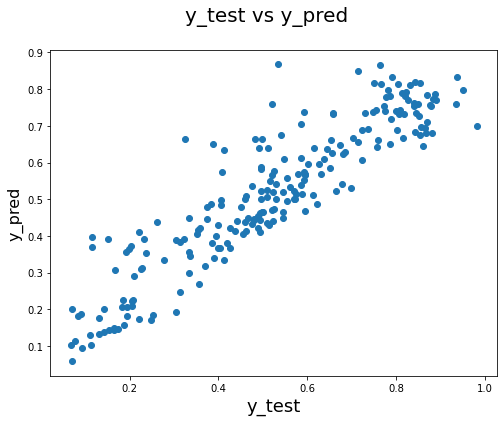

In [114]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize=20)
# X-label
plt.xlabel('y_test', fontsize=18)
# Y-label
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Step 10: Evaluate the model

In [110]:
#importing libraries to calculate r2_score
from sklearn.metrics import r2_score

In [111]:
#r-square train
r2_score(y_true= y_train, y_pred= y_train_cnt)

0.7923571436345367

In [112]:
#r-square test
r2_score(y_true= y_test, y_pred= y_pred)

0.8201871195878034